In [30]:
import requests
import json
from DbConn import *
from datetime import datetime, timedelta

def week_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd, max(movienm), avg(mrank), min(mrank),avg(salesshare),max(salesshare),avg(audicnt), max(audicnt),avg(scrncnt), max(scrncnt), avg(showcnt), max(showcnt),max(audiacc) 
    from boxoffice  
    where  opendt +13 >= dailydate2 and dailydate2 < TO_DATE('19/01/01', 'YY/mm/dd')
    group by moviecd
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("첫주 작업 완료. -----")
    db.disconnect()
    return  select_result


def max_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd,  max(audiacc)
    from boxoffice 
    group by moviecd
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result

print(week_dataframe())

# print(max_dataframe())


첫주 작업 완료. -----
[(20041524, '극장판 포켓몬스터 AG - 아름다운 소원의 별 지라치', 10, 10, 0.6571428571428571, 1, 8737.142857142857, 18639, 117, 123, 222.57142857142858, 256, 61917), (20068576, '그날의 분위기', 3.642857142857143, 2, 10.842857142857143, 17.1, 43980.142857142855, 111188, 462.2142857142857, 592, 1809.5, 2854, 623241), (20068659, '명탐정 코난 : 탐정들의 진혼가 ', 7.8, 5, 2.08, 3.3, 15188.8, 37439, 231.1, 294, 462.5, 656, 158425), (20078561, '명탐정 코난:감벽의 관', 7, 5, 2.142857142857143, 3.7, 16773.14285714286, 41627, 367, 487, 580.2857142857143, 881, 236035), (20098169, '쥬라기 월드', 1.8666666666666667, 1, 49.693333333333335, 74.1, 248915.6, 645152, 978.3333333333334, 1290, 5243.4, 7047, 3733734), (20100211, '다이노 타임', 5.7272727272727275, 3, 2.3727272727272726, 6.1, 21635.18181818182, 76452, 279, 430, 431.90909090909093, 831, 239114), (20122021, '트랜스포머: 사라진 시대', 1.2857142857142858, 1, 53.2, 80.5, 307589.14285714284, 793451, 1289.857142857143, 1602, 5721.285714285715, 7795, 4310112), (20122787, '또 하나의 약속', 5.333333333333333

In [56]:
import pandas as pd

df_week_column_name = ['mnumber', 'mname','avg_rank', 'min_rank', 
                       'avg_dshare','max_dshare', 
                       'avg_dpeople','max_dpeople', 'avg_dscreen','max_dscreen',
                       'avg_dview','max_dview','sum_dpeople']
df_week = pd.DataFrame(week_dataframe(), columns=df_week_column_name)
df_week.tail()


첫주 작업 완료. -----


,mnumber,mname,avg_rank,min_rank,avg_dshare,max_dshare,avg_dpeople,max_dpeople,avg_dscreen,max_dscreen,avg_dview,max_dview,sum_dpeople
1226,20189843,호두까기 인형과 4개의 왕국,4.615385,4,5.715385,8.1,33308.153846,82644,252.153846,294,971.384615,1320,433779
1227,20189861,더 포스트,8.818182,8,2.009091,3.0,9399.636364,17818,221.000000,281,454.636364,614,111760
1228,20189869,해피 투게더,9.600000,9,0.460000,0.6,2160.000000,3191,169.400000,240,244.400000,373,20989
1229,20189882,반딧불이 딘딘,9.000000,9,1.600000,1.7,5105.000000,5494,272.000000,274,332.000000,335,29414
1230,20189901,더 포리너,9.750000,9,2.025000,3.9,4963.250000,8178,150.750000,156,462.000000,547,35694


In [57]:
df_max_column_name = ['mnumber', 'sum_total_people']
df_max = pd.DataFrame(max_dataframe(), columns=df_max_column_name )
df_max.tail()

누적 작업 완료. -----


,mnumber,sum_total_people
1548,20199949,8991
1549,20199950,5234641
1550,20199951,471266
1551,20199954,8491
1552,20199981,143853


In [58]:
df = pd.merge(df_week,df_max, on='mnumber')
df.tail()

,mnumber,mname,avg_rank,min_rank,avg_dshare,max_dshare,avg_dpeople,max_dpeople,avg_dscreen,max_dscreen,avg_dview,max_dview,sum_dpeople,sum_total_people
1226,20189843,호두까기 인형과 4개의 왕국,4.615385,4,5.715385,8.1,33308.153846,82644,252.153846,294,971.384615,1320,433779,481315
1227,20189861,더 포스트,8.818182,8,2.009091,3.0,9399.636364,17818,221.000000,281,454.636364,614,111760,111760
1228,20189869,해피 투게더,9.600000,9,0.460000,0.6,2160.000000,3191,169.400000,240,244.400000,373,20989,20989
1229,20189882,반딧불이 딘딘,9.000000,9,1.600000,1.7,5105.000000,5494,272.000000,274,332.000000,335,29414,29414
1230,20189901,더 포리너,9.750000,9,2.025000,3.9,4963.250000,8178,150.750000,156,462.000000,547,35694,35694


In [87]:
# df['sum_total_people'].describe()
print(df['sum_total_people'].quantile(q=0.9, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.75, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.5, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.25, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0, interpolation='nearest')
     )

a = df['sum_total_people'].quantile(q=0.9, interpolation='nearest')
b = df['sum_total_people'].quantile(q=0.75, interpolation='nearest')
c = df['sum_total_people'].quantile(q=0.5, interpolation='nearest')
d = df['sum_total_people'].quantile(q=0.25, interpolation='nearest')
e = df['sum_total_people'].quantile(q=0, interpolation='nearest')
# 10%
# 25%
# 50%
# 75%
# 100%

2607123 679870 129584 30303 810


In [88]:
score_list = []
for i in df['sum_total_people']:
    if i >= a:
        score_list.append('A')
    elif i >= b:
        score_list.append('B')
    elif i >= c:
        score_list.append('C')
    elif i >= d:
        score_list.append('D')
    else :
        score_list.append('F')

        
df['score'] = score_list
df['score'].head()

0    D
1    C
2    C
3    C
4    A
Name: score, dtype: object

In [89]:
df.groupby('score')['score'].count()

score
A    124
B    185
C    307
D    307
F    308
Name: score, dtype: int64

In [90]:
X = df.drop(['mnumber', 'mname','sum_total_people','score'], axis=1)
X.tail()

,avg_rank,min_rank,avg_dshare,max_dshare,avg_dpeople,max_dpeople,avg_dscreen,max_dscreen,avg_dview,max_dview,sum_dpeople
1226,4.615385,4,5.715385,8.1,33308.153846,82644,252.153846,294,971.384615,1320,433779
1227,8.818182,8,2.009091,3.0,9399.636364,17818,221.000000,281,454.636364,614,111760
1228,9.600000,9,0.460000,0.6,2160.000000,3191,169.400000,240,244.400000,373,20989
1229,9.000000,9,1.600000,1.7,5105.000000,5494,272.000000,274,332.000000,335,29414
1230,9.750000,9,2.025000,3.9,4963.250000,8178,150.750000,156,462.000000,547,35694


In [91]:
Y=df['score']

In [92]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# train, test 7:3
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.3, random_state=999)

In [93]:
model = RandomForestClassifier(n_estimators=10, random_state=999)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=999, verbose=0, warm_start=False)

In [94]:
model.score(X_train,y_train)

0.9965156794425087

In [95]:
model.score(X_test,y_test)

0.9351351351351351

In [96]:
# cunfuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conMat = pd.DataFrame(confusion_matrix(y_test,y_pred),
                         index=['True[A]', 'True[B]', 'True[C]', 'True[D]',  'True[F]'],
                         columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]', 'Pred[F]'])

 # 정확도, precision, recall, f1
conMat

,Pred[A],Pred[B],Pred[C],Pred[D],Pred[F]
True[A],30,2,1,0,0
True[B],9,52,3,0,0
True[C],0,0,83,2,0
True[D],0,0,3,90,3
True[F],0,0,0,1,91


In [97]:
feat_labels = X.columns
feat_labels

Index(['avg_rank', 'min_rank', 'avg_dshare', 'max_dshare', 'avg_dpeople',
       'max_dpeople', 'avg_dscreen', 'max_dscreen', 'avg_dview', 'max_dview',
       'sum_dpeople'],
      dtype='object')

 1) max_dview                      0.020499
 2) max_dshare                     0.069611
 3) avg_dpeople                    0.165376
 4) avg_dshare                     0.072341
 5) min_rank                       0.003833
 6) sum_dpeople                    0.393978
 7) max_dscreen                    0.012655
 8) avg_dview                      0.018789
 9) avg_dscreen                    0.012680
10) max_dpeople                    0.207217
11) avg_rank                       0.023022


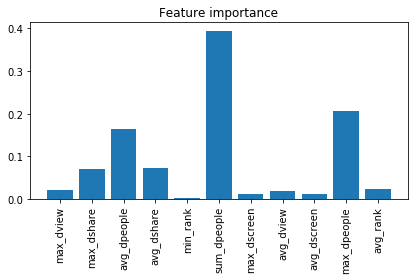

In [98]:
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances[::-1])
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"%(f+1,30,feat_labels[indices[f]],
                         importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.tight_layout()
plt.show()